## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```



The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv')

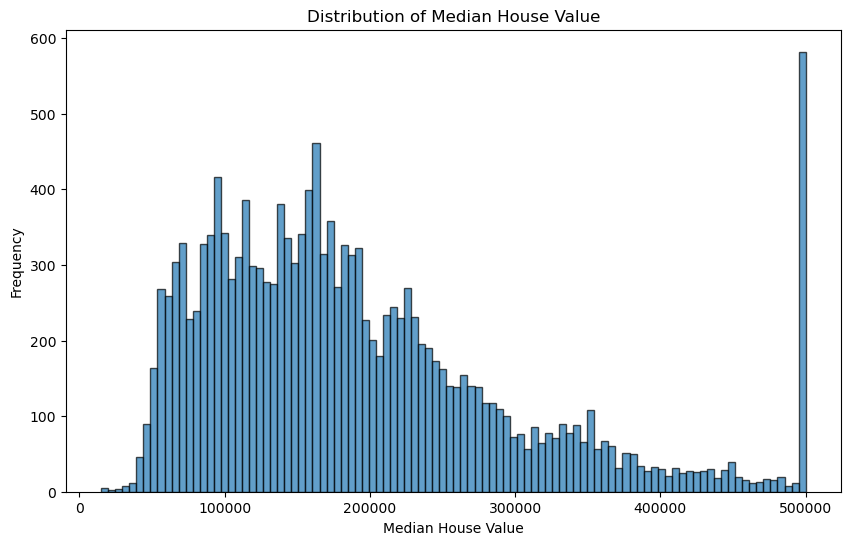

In [93]:
import matplotlib.pyplot as plt

# Plot a histogram of the median_house_value
plt.figure(figsize=(10, 6))
plt.hist(df['median_house_value'], bins=100, edgecolor='black', alpha=0.7)
plt.xlabel('Median House Value')
plt.ylabel('Frequency')
plt.title('Distribution of Median House Value')
plt.show()


In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### Preparing the dataset 

For this homework, we only want to use a subset of data. 

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Next, use only the following columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

In [4]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [5]:
df = df[df['ocean_proximity'].isin(['<1H OCEAN','INLAND'])]

In [6]:
columns_to_select = ['latitude', 'longitude', 'housing_median_age', 'total_rooms',
                     'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value']

selected_columns_df = df[columns_to_select]  # Using indexing

# Alternatively, you can use loc to select by label
selected_columns_df = df.loc[:, columns_to_select]

### Question 1

There's one feature with missing values. What is it?

* `total_rooms`
* `total_bedrooms`
* `population`
* `households`

In [7]:
selected_columns_df.isnull().sum()

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        157
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

`total_bedrooms` column have missing values

### Question 2

What's the median (50% percentile) for variable `'population'`?

- 995
- 1095
- 1195
- 1295

In [8]:
selected_columns_df['population'].quantile(0.5)

1195.0

In [110]:
selected_columns_df['population'].median()

1195.0

#### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Apply the log transformation to the `median_house_value` variable using the `np.log1p()` function.

In [9]:
shuffled_df = selected_columns_df.sample(frac=1, random_state=42)

In [9]:
shuffled_df

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
6651,34.15,-118.14,41.0,1256.0,407.0,855.0,383.0,1.9923,500001.0
17810,37.40,-121.86,19.0,4043.0,764.0,2196.0,708.0,6.1504,268400.0
6850,34.07,-118.15,52.0,1983.0,344.0,887.0,331.0,3.2875,234400.0
2161,36.78,-119.81,37.0,1965.0,364.0,796.0,335.0,3.6250,83400.0


In [97]:
# Split the data into train/val/test sets (60%/20%/20%)
train_df, temp_df = train_test_split(shuffled_df, test_size=0.4, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [98]:
# Apply log transformation to the 'median_house_value' variable
train_df['median_house_value'] = np.log1p(train_df['median_house_value'])
val_df['median_house_value'] = np.log1p(val_df['median_house_value'])
test_df['median_house_value'] = np.log1p(test_df['median_house_value'])

# Print the first few rows of each dataset
print("Train dataset:")
print(train_df.head())

print("\nValidation dataset:")
print(val_df.head())

print("\nTest dataset:")
print(test_df.head())

Train dataset:
       latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
16677     35.13    -120.66                41.0       2666.0           751.0   
3158      35.26    -118.95                24.0       1341.0           214.0   
2355      36.77    -119.68                21.0       1260.0           182.0   
12879     38.65    -121.38                34.0        825.0           173.0   
9526      39.13    -123.16                33.0       1320.0           303.0   

       population  households  median_income  median_house_value  
16677       940.0       507.0         1.9653           12.372015  
3158        667.0       184.0         4.0000           11.456366  
2355        583.0       205.0         6.0132           11.923716  
12879       355.0       130.0         3.1858           11.603689  
9526       1048.0       303.0         1.7813           11.458480  

Validation dataset:
      latitude  longitude  housing_median_age  total_rooms  total_bedrooms  \
4055     

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [99]:
train_df.head(2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
16677,35.13,-120.66,41.0,2666.0,751.0,940.0,507.0,1.9653,12.372015
3158,35.26,-118.95,24.0,1341.0,214.0,667.0,184.0,4.0000,11.456366


In [100]:
# Replace missing values with 0 for 'total_bedrooms'
train_df_fill_0 = train_df.fillna(0)
val_df_fill_0 = val_df.fillna(0)

In [101]:
# Calculate the mean of 'total_bedrooms' using the training data
mean_total_bedrooms = train_df['total_bedrooms'].mean()

# Replace missing values with the mean for 'total_bedrooms'
train_df_fill_mean = train_df.fillna({'total_bedrooms': mean_total_bedrooms})
val_df_fill_mean = val_df.fillna({'total_bedrooms': mean_total_bedrooms})

In [102]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt


# Function to train a linear regression model and calculate RMSE
def train_and_evaluate(df_train, df_val):
    X_train = df_train.drop('median_house_value', axis=1)
    y_train = df_train['median_house_value']
    
    X_val = df_val.drop('median_house_value', axis=1)
    y_val = df_val['median_house_value']
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

In [103]:
# Train models and calculate RMSE for both options
rmse_0 = train_and_evaluate(train_df_fill_0, val_df_fill_0)
rmse_mean = train_and_evaluate(train_df_fill_mean, val_df_fill_mean)

In [104]:
rmse_0

0.34646080984445854

In [105]:
rmse_mean

0.34620971085273505

In [111]:
# Compare RMSE scores and determine the better option
better_option = None
rmse_0 = round(rmse_0, 2)
rmse_mean = round(rmse_mean, 2)
if rmse_0 < rmse_mean:
    better_option = 'With 0'
elif rmse_mean < rmse_0:
    better_option = 'With mean'
else:
    better_option = 'Both are equally good'

# Print the RMSE scores rounded to 2 decimal places and the better option
print("RMSE with 0:", round(rmse_0, 2))
print("RMSE with mean:", round(rmse_mean, 2))
print("Option:", better_option)

RMSE with 0: 0.35
RMSE with mean: 0.35
Option: Both are equally good


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.000001
- 0.001
- 0.0001

In [107]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

# List of regularization parameters to try
regularization_params = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

# Fill missing values with 0 for 'total_bedrooms'
train_df_fill_0 = train_df.fillna(0)
val_df_fill_0 = val_df.fillna(0)

# Function to train a regularized linear regression model and calculate RMSE
def train_and_evaluate_ridge(df_train, df_val, alpha):
    X_train = df_train.drop('median_house_value', axis=1)
    y_train = df_train['median_house_value']
    
    X_val = df_val.drop('median_house_value', axis=1)
    y_val = df_val['median_house_value']
    
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # Predict on the validation set
    y_pred = model.predict(X_val)
    
    # Calculate RMSE using mean_squared_error
    rmse = sqrt(mean_squared_error(y_val, y_pred))
    
    return rmse

In [108]:
# Dictionary to store RMSE scores for each regularization parameter
rmse_scores = {}

# Train models and calculate RMSE for each value of alpha
for alpha in regularization_params:
    rmse = train_and_evaluate_ridge(train_df_fill_0, val_df_fill_0, alpha)
    rmse_scores[alpha] = round(rmse, 2)

# Find the best alpha (smallest RMSE)
best_alpha = min(rmse_scores, key=rmse_scores.get)

In [112]:
rmse_scores

{0: 0.35,
 1e-06: 0.35,
 0.0001: 0.35,
 0.001: 0.35,
 0.01: 0.35,
 0.1: 0.35,
 1: 0.35,
 5: 0.35,
 10: 0.35}

### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.5
- 0.05
- 0.005
- 0.0005

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [79]:
seed_values = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# List to store RMSE scores for each seed
rmse_scores = []

# Function to perform train/validation/test split and calculate RMSE
def calculate_rmse(seed):
    # Split the data using the current seed
    train_df, temp_df = train_test_split(shuffled_df, test_size=0.4, random_state=seed)
    val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=seed)
    
    train_df['median_house_value'] = np.log1p(train_df['median_house_value'])
    val_df['median_house_value'] = np.log1p(val_df['median_house_value'])
    test_df['median_house_value'] = np.log1p(test_df['median_house_value'])
    # Fill missing values with 0 for 'total_bedrooms'
    train_df_fill_0 = train_df.fillna(0)
    val_df_fill_0 = val_df.fillna(0)

    # Train a model without regularization and calculate RMSE
    rmse = train_and_evaluate(train_df_fill_0, val_df_fill_0)

    return rmse

# Calculate RMSE for each seed and collect the scores
for seed in seed_values:
    rmse = calculate_rmse(seed)
    rmse_scores.append(rmse)

In [81]:
# Calculate the standard deviation of RMSE scores
std_deviation = np.std(rmse_scores)

# Round the standard deviation to 3 decimal places
rounded_std_deviation = round(std_deviation, 3)

# Print the standard deviation
print("Standard deviation of RMSE scores:", rounded_std_deviation)

Standard deviation of RMSE scores: 0.006


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 0.13
- 0.23
- 0.33
- 0.43

In [82]:
# Split the data using seed 9
train_df, temp_df = train_test_split(shuffled_df, test_size=0.4, random_state=9)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=9)

train_df['median_house_value'] = np.log1p(train_df['median_house_value'])
val_df['median_house_value'] = np.log1p(val_df['median_house_value'])
test_df['median_house_value'] = np.log1p(test_df['median_house_value'])

# Combine train and validation datasets
train_val_df = pd.concat([train_df, val_df])

# Fill missing values with 0 for 'total_bedrooms'
train_val_df_fill_0 = train_val_df.fillna(0)
test_df_fill_0 = test_df.fillna(0)

# Train a regularized linear regression model with r=0.001
alpha = 0.001
X_train_val = train_val_df_fill_0.drop('median_house_value', axis=1)
y_train_val = train_val_df_fill_0['median_house_value']

X_test = test_df_fill_0.drop('median_house_value', axis=1)
y_test = test_df_fill_0['median_house_value']

model = Ridge(alpha=alpha)
model.fit(X_train_val, y_train_val)

# Predict on the test set
y_pred_test = model.predict(X_test)

In [86]:
# Calculate RMSE on the test dataset
rmse_test = mean_squared_error(y_test, y_pred_test, squared=False)

# Print the RMSE on the test dataset
print("RMSE on the test dataset:", round(rmse_test, 2))

RMSE on the test dataset: 0.34


## Submit the results

- Submit your results here: https://forms.gle/nNUTLzz3F9KiFHNp9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is September 25 (Monday), 23:00 CET. After that the form will be closed.